In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import seaborn
import re

% matplotlib inline

In [2]:
us_vc = pd.read_csv("../data/us_investors_top1000.csv")
print(us_vc.shape)

id_list = []
for num in range(0, us_vc.shape[0]):
    id_list.append(num)

(1000, 11)


In [3]:
us_vc["vc_id"] = id_list

# Series(df.Letter.values,index=df.Position).to_dict()

vc_id_dict = dict(zip(us_vc["Organization/Person Name"], us_vc["vc_id"]))

## Scripting for data preprocessing

In [4]:
def clean_currency(df, col, regex):
    df[col] = df[col].str.replace(",", "")
    for i in range(0, df.shape[0]):
        df[col].iloc[i] = regex.search(df[col].iloc[i]).group()

def invested(df, money_raised, num_investors):
    df["individual_invested"] = money_raised/num_investors

def dilution(df, money_raised, pre_money):
    df["dilution"] = money_raised/(pre_money + money_raised)
    
def equity_held(df, individual_invested, pre_money, money_raised):
    df["equity"] = individual_invested/(pre_money + money_raised)

def raised_growth():
    pass

def total_equity_held():
    pass

In [5]:
def to_boolean(df, col):
    """Convert "no" string to False and "yes" string to True"""
    df.loc[(df[col] == "No"), col] = False
    df.loc[(df[col] == "Yes"), col] = True

## Scripting for loading multiple files

In [6]:
def read_csv(file_name, db_type):
    path = "../data/" + db_type + "_" + file_name + ".csv"
    df = pd.read_csv(path)
    return df

def add_investor(df, investor):
    df["Investor"] = investor
    return df

In [7]:
def make_file(file_name, db_type, investor):    
    df = add_investor(read_csv(file_name, db_type), investor)
    
    return df

In [8]:
e_accel = make_file("accel", "exits", "Accel Partners")
e_accel.shape

(235, 41)

In [9]:
file_list = []
investor_list = []

In [10]:
def load_multiple_files(file_list, db_type, investor_list):
    pass

In [11]:
def read_csv(file_name, file_type):
    path = "../data/" + file_name
    return pd.read_csv(path)

def add_investor(df, investor):
    df["Investor"] = investor

### Manually loading files

In [12]:
e_500 = pd.read_csv("../data/exits_500startups.csv")
e_500["Investor"] = "500 Startups"
e_accel = pd.read_csv("../data/exits_accel.csv")
e_accel["Investor"] = "Accel Partners"
e_draper = pd.read_csv("../data/exits_draper.csv")
e_draper["Investor"] = "Draper Fisher Jurvetson (DFJ)"
e_kl = pd.read_csv("../data/exits_kleiner.csv")
e_kl["Investor"] = "Kleiner Perkins Caufield & Byers"
e_new = pd.read_csv("../data/exits_newenterprise.csv")
e_new["Investor"] = "New Enterprise Associates"
e_nyse = pd.read_csv("../data/exits_NYSERDA.csv")
e_nyse["Investor"] = "NYSERDA"
e_sequoia = pd.read_csv("../data/exits_sequonia.csv")
e_sequoia["Investor"] = "Sequoia Capital"
e_SOSV = pd.read_csv("../data/exits_SOSV.csv")
e_SOSV["Investor"] = "SOSV"
e_SV = pd.read_csv("../data/exits_SVangel.csv")
e_SV["Investor"] = "SV Angel"
e_y = pd.read_csv("../data/exits_ycomb.csv")
e_y["Investor"] = "Y Combinator"

f_500 = pd.read_csv("../data/fund_500startups.csv")
f_500["Investor"] = "500 Startups"
f_accel = pd.read_csv("../data/fund_accel.csv")
f_accel["Investor"] = "Accel Partners"
f_draper = pd.read_csv("../data/fund_draper.csv")
f_draper["Investor"] = "Draper Fisher Jurvetson (DFJ)"
f_kl = pd.read_csv("../data/fund_kleiner.csv")
f_kl["Investor"] = "Kleiner Perkins Caufield & Byers"
f_new = pd.read_csv("../data/fund_newenterprise.csv")
f_new["Investor"] = "New Enterprise Associates"
f_nyse = pd.read_csv("../data/fund_NYSERDA.csv")
f_nyse["Investor"] = "NYSERDA"
f_sequoia = pd.read_csv("../data/fund_sequonia.csv")
f_sequoia["Investor"] = "Sequoia Capital"
f_SOSV = pd.read_csv("../data/fund_SOSV.csv")
f_SOSV["Investor"] = "SOSV"
f_SV = pd.read_csv("../data/fund_SVangel.csv")
f_SV["Investor"] = "SV Angel"
f_y = pd.read_csv("../data/fund_ycomb.csv")
f_y["Investor"] = "Y Combinator"


In [13]:
print(e_500.shape)
print(e_accel.shape)
print(e_draper.shape)
print(e_kl.shape)

(151, 37)
(235, 41)
(162, 36)
(194, 36)


In [14]:
set(e_accel.columns) - set(e_500.columns)

{'Accelerator Application Deadline',
 'Accelerator Duration (in weeks)',
 'Accelerator Program Type',
 'Number of Lead Investors',
 'Website'}

In [15]:
set(e_500.columns) - set(e_draper.columns)

{'Categories', 'Number of Events'}

In [16]:
e_500.drop('Number of Events',
            axis = 1, inplace = True, errors = "raise")

In [17]:
e_accel.drop(['Accelerator Application Deadline', 'Accelerator Duration (in weeks)', 
              'Accelerator Program Type','Website'],
            axis = 1, inplace = True, errors = "raise")

## Categories vs. category groups

In [18]:
e_accel[["Categories", "Category Groups"]]

,Categories,Category Groups
0,"Consumer Electronics, Gaming, iOS, Product Design","Consumer Electronics, Design, Gaming, Hardware..."
1,"Advertising, Internet, Retail, Social Media","Advertising, Commerce and Shopping, Internet S..."
2,"Cloud Computing, Linux, Security, Software, We...","Internet Services, Platforms, Privacy and Secu..."
3,"Social, Social Media, Social Network","Internet Services, Media and Entertainment"
4,"Collaboration, Developer Tools, Enterprise Sof...",Software
5,"Lifestyle, Printing, Publishing","Community and Lifestyle, Content and Publishin..."
6,"Consumer, Test and Measurement",Data and Analytics
7,"Internet, Mobile Apps, Real Estate, Rental","Apps, Commerce and Shopping, Internet Services..."
8,"Analytics, Big Data, Cloud Computing, Cloud Da...","Artificial Intelligence, Data and Analytics, H..."
9,"Accounting, Banking, Billing, Collaboration, F...","Financial Services, Lending and Investments, P..."


do we need this? Categories ontop of category groups?

# Merge Funded startups together

In [19]:
f_accel.columns

Index(['Transaction Name', 'Transaction Name URL', 'Organization Name',
       'Organization Name URL', 'Funding Type', 'Money Raised',
       'Announced Date', 'Funding Stage', 'Pre-Money Valuation',
       'Number of Investors', 'Number of Partner Investors',
       'Equity Only Funding', 'Investor'],
      dtype='object')

In [20]:
f_merge = pd.concat([f_500, f_accel, f_draper, f_kl, f_new, f_nyse, f_sequoia, f_SOSV, f_SV, f_y], 
                    axis = 0, join = 'outer', ignore_index = 'False')
f_merge.drop(["CB Rank (Funding Round)", "Number of Partner Investors",
             "Organization Name URL", "Transaction Name URL"], axis = 1, inplace = True)
f_merge.to_csv("../output/raw_funding.csv", index = False)


############################################
to_boolean(f_merge, "Equity Only Funding")

In [21]:
f_merge.columns

Index(['Announced Date', 'Equity Only Funding', 'Funding Stage',
       'Funding Type', 'Investor', 'Money Raised', 'Number of Investors',
       'Organization Name', 'Pre-Money Valuation', 'Transaction Name'],
      dtype='object')

In [22]:
f_merge.sort_values(["Organization Name", "Pre-Money Valuation"])

,Announced Date,Equity Only Funding,Funding Stage,Funding Type,Investor,Money Raised,Number of Investors,Organization Name,Pre-Money Valuation,Transaction Name
18,"Nov 21, 2017",True,Early Stage Venture,Series A,500 Startups,NaN,3,Justmop.com,NaN,Series A - Justmop.com
5777,"Oct 24, 2017",True,Early Stage Venture,Series B,Sequoia Capital,"$28,000,000",5,NimbleRx,NaN,Series B - NimbleRx
6035,"Oct 13, 2015",True,Early Stage Venture,Series A,Sequoia Capital,"$12,000,000",5,NimbleRx,NaN,Series A - NimbleRx
7845,"Oct 13, 2015",True,Early Stage Venture,Series A,SV Angel,"$12,000,000",5,NimbleRx,NaN,Series A - NimbleRx
8568,"Oct 24, 2017",True,Early Stage Venture,Series B,Y Combinator,"$28,000,000",5,NimbleRx,NaN,Series B - NimbleRx
27,"Oct 25, 2017",True,Seed,Seed,500 Startups,"$550,000",5,SpotDraft,NaN,Seed Round - SpotDraft
8939,"Aug 23, 2016",True,Seed,Seed,Y Combinator,"$120,000",1,/dev/color,NaN,Seed Round - /dev/color
8658,"Jul 1, 2017",True,Seed,Seed,Y Combinator,"$120,000",1,10 By 10,NaN,Seed Round - 10 By 10
8314,"Feb 16, 2011",True,Early Stage Venture,Series A,SV Angel,"$2,520,000",10,1000memories,NaN,Series A - 1000memories
6256,"Jul 31, 2014",True,Early Stage Venture,Series B,Sequoia Capital,"$10,000,000",2,1006.tv,NaN,Series B - 1006.tv


In [27]:
e_merge = pd.concat([e_500, e_accel, e_draper, e_kl, e_new, e_nyse, e_sequoia, e_SOSV, e_SV, e_y], 
                    axis = 0, join = 'outer', ignore_index = 'False')
e_merge.to_csv("../output/raw_exits.csv", index = False)

In [28]:
e_merge.sort_values("Organization Name")

,Acquisition Status,CB Rank (Organization),Categories,Category Groups,Closed Date,Company Type,Delisted Date,Description,Founded Date,Funding Status,...,Number of Investors,Number of Lead Investments,Number of Lead Investors,Number of Portfolio Organizations,Operating Status,Organization Name,Organization Name URL,Total Equity Funding Amount,Total Funding Amount,Valuation at IPO
1390,Was Acquired,"16,658",NaN,"Content and Publishing, Internet Services, Med...",NaN,For Profit,NaN,"1000Memories allows people to organize, share,...",2010,M&A,...,11,NaN,1.0,NaN,Active,1000memories,https://www.crunchbase.com/organization/1000me...,"$2,535,000","$2,535,000",NaN
1567,Was Acquired,"16,658",NaN,"Content and Publishing, Internet Services, Med...",NaN,For Profit,NaN,"1000Memories allows people to organize, share,...",2010,M&A,...,11,NaN,1.0,NaN,Active,1000memories,https://www.crunchbase.com/organization/1000me...,"$2,535,000","$2,535,000",NaN
1396,Was Acquired,"17,748",NaN,"Advertising, Data and Analytics, Sales and Mar...",NaN,For Profit,NaN,"140 Proof, an advertising solutions provider, ...",Apr 2009,M&A,...,4,NaN,1.0,NaN,Active,140 Proof,https://www.crunchbase.com/organization/140-proof,"$5,500,000","$5,500,000",NaN
1640,Was Acquired,"94,215",NaN,Software,NaN,For Profit,NaN,280 North is a web software development platfo...,2008,M&A,...,4,NaN,NaN,NaN,Active,280 North,https://www.crunchbase.com/organization/280-north,"$250,000","$250,000",NaN
332,"Made Acquisitions, Was Acquired","98,540","Communications Infrastructure, Internet, Telec...","Hardware, Internet Services",NaN,For Profit,NaN,"2Wire is a San Jose, Calif. provider of broadb...","Jul 1, 1998",M&A,...,14,NaN,3.0,NaN,Active,2Wire,https://www.crunchbase.com/organization/2wire,"$162,000,000","$162,000,000",NaN
303,Was Acquired,"48,175","Android, Enterprise Software, Mobile","Mobile, Platforms, Software",NaN,For Profit,NaN,3LM is a stealth startup that builds mobile en...,Jul 2010,M&A,...,1,NaN,NaN,NaN,Active,3LM,https://www.crunchbase.com/organization/3lm,"$1,500,000","$1,500,000",NaN
577,Was Acquired,"2,806",NaN,"Data and Analytics, Information Technology, In...",NaN,NaN,NaN,3VR provides video business intelligence solut...,2002,M&A,...,7,NaN,3.0,NaN,Active,3VR,https://www.crunchbase.com/organization/3vr-se...,"$61,000,000","$64,567,194",NaN
966,Was Acquired,"144,336",NaN,"Consumer Electronics, Hardware, Internet Services",NaN,For Profit,NaN,"3ware, Inc., the technology leader in high-cap...",1980,M&A,...,8,NaN,1.0,NaN,Active,3ware,https://www.crunchbase.com/organization/3ware,"$69,000,000","$69,000,000",NaN
627,Was Acquired,"11,385",NaN,"Commerce and Shopping, Privacy and Security",NaN,NaN,NaN,41st Parameter provides solutions to reduce fr...,2004,M&A,...,7,NaN,3.0,NaN,Active,41st Parameter,https://www.crunchbase.com/organization/41st-p...,"$42,414,570","$42,414,570",NaN
1533,Was Acquired,"10,691",NaN,"Commerce and Shopping, Sales and Marketing, So...",NaN,For Profit,NaN,500friend provides loyalty marketing solutions...,2009,M&A,...,22,NaN,3.0,NaN,Active,500Friends,https://www.crunchbase.com/organization/500fri...,"$10,900,000","$12,900,000",NaN


In [29]:
# with total funded amount + investors + equity you can calculate the *multiplier* 
# if the other pre-money evaluations are given

e_merge[e_merge["Acquisition Status"].str.contains("Was Acquired") == True]

,Acquisition Status,CB Rank (Organization),Categories,Category Groups,Closed Date,Company Type,Delisted Date,Description,Founded Date,Funding Status,...,Number of Investors,Number of Lead Investments,Number of Lead Investors,Number of Portfolio Organizations,Operating Status,Organization Name,Organization Name URL,Total Equity Funding Amount,Total Funding Amount,Valuation at IPO
0,"Made Acquisitions, Was Acquired",13,"Content, News, Social Bookmarking, Social Medi...","Content and Publishing, Internet Services, Med...",NaN,For Profit,NaN,"Reddit is an online platform, enabling its use...",2005,M&A,...,23,NaN,NaN,1.0,Active,Reddit,https://www.crunchbase.com/organization/reddit,"$250,100,000","$250,100,000",NaN
2,Was Acquired,629,"Apps, Email, Events, Mobile","Apps, Events, Information Technology, Internet...","Aug 31, 2016",For Profit,NaN,Sunrise is a free calendar app specifically de...,"Dec 1, 2012",M&A,...,27,NaN,NaN,NaN,Closed,Sunrise,https://www.crunchbase.com/organization/sunrise,"$8,220,410","$8,220,410",NaN
3,Was Acquired,"1,262","Banking, Enterprise Software, Financial Servic...","Financial Services, Lending and Investments, S...",NaN,For Profit,NaN,Simple is a web and mobile application that un...,2009,M&A,...,12,NaN,NaN,NaN,Active,Simple,https://www.crunchbase.com/organization/banksi...,"$15,290,000","$15,290,000",NaN
6,Was Acquired,"2,050","Brand Marketing, Content, Internet, Presentations","Internet Services, Media and Entertainment, Sa...",NaN,For Profit,NaN,Visually is the content creation platform that...,2011,M&A,...,15,NaN,NaN,NaN,Active,Visually,https://www.crunchbase.com/organization/visual-ly,"$13,400,000","$15,700,000",NaN
7,"Made Acquisitions, Was Acquired","2,618","E-Commerce, SaaS, Tourism, Travel","Commerce and Shopping, Software, Travel and To...",NaN,For Profit,NaN,ZOZI designs and develops a web-based bookings...,2008,M&A,...,25,NaN,NaN,NaN,Active,ZOZI,https://www.crunchbase.com/organization/zozi,"$44,300,000","$44,300,000",NaN
8,Was Acquired,"3,560","Android, CRM, iOS, Mobile, SaaS","Information Technology, Mobile, Platforms, Sal...",NaN,For Profit,NaN,SkyGiraffe is an enterprise mobility platform ...,"Dec 1, 2012",M&A,...,14,NaN,NaN,NaN,Active,SkyGiraffe,https://www.crunchbase.com/organization/skygir...,"$10,500,000","$10,500,000",NaN
9,Was Acquired,"3,872","Email, Messaging, SaaS","Information Technology, Internet Services, Mes...",NaN,For Profit,NaN,Rapportive is an email add-on that displays so...,2010,M&A,...,18,NaN,NaN,NaN,Active,Rapportive,https://www.crunchbase.com/organization/rappor...,"$1,000,000","$1,000,000",NaN
10,Was Acquired,"3,899","Analytics, Big Data, Cloud Computing, Develope...","Data and Analytics, Internet Services, Software",NaN,For Profit,NaN,Keen IO is a custom analytics back-end for dev...,"Dec 1, 2011",M&A,...,35,NaN,NaN,1.0,Active,Keen IO,https://www.crunchbase.com/organization/keen,"$29,218,000","$29,218,000",NaN
11,Was Acquired,"4,131","Analytics, Big Data, Natural Resources","Data and Analytics, Natural Resources, Sustain...",NaN,For Profit,NaN,Valor Water Analytics develops customized fina...,"Nov 12, 2013",M&A,...,9,NaN,NaN,NaN,Active,Valor Water Analytics,https://www.crunchbase.com/organization/valor-...,"$2,840,000","$2,840,000",NaN
12,"Made Acquisitions, Was Acquired","4,389","Music, TV, Video, Video Streaming","Content and Publishing, Media and Entertainmen...",NaN,For Profit,NaN,Brings global prime-time entertainment to new ...,2010,M&A,...,18,1.0,NaN,1.0,Active,Viki,https://www.crunchbase.com/organization/viki,"$24,300,000","$24,300,000",NaN


In [67]:
e_merge.columns

Index(['Acquisition Status', 'CB Rank (Organization)', 'Categories',
       'Category Groups', 'Closed Date', 'Company Type', 'Delisted Date',
       'Description', 'Founded Date', 'Funding Status',
       'Headquarters Location', 'IPO Date', 'IPO Status', 'Investment Stage',
       'Investor', 'Investor Type', 'Last Equity Funding Amount',
       'Last Equity Funding Type', 'Last Funding Amount', 'Last Funding Date',
       'Last Funding Type', 'Money Raised at IPO', 'Number of Employees',
       'Number of Exits', 'Number of Founders', 'Number of Funding Rounds',
       'Number of Investments', 'Number of Investors',
       'Number of Lead Investments', 'Number of Lead Investors',
       'Number of Portfolio Organizations', 'Operating Status',
       'Organization Name', 'Organization Name URL',
       'Total Equity Funding Amount', 'Total Funding Amount',
       'Valuation at IPO', 'Investor_ID'],
      dtype='object')

In [32]:
e_merge[["Investor","Investor Type"]] 
e_merge["Investor_ID"] = us_vc["vc_id"]

# Pre-Money Valuation Raises

In [34]:
f_pre = f_merge[(f_merge["Pre-Money Valuation"].notnull() == True) & (f_merge["Money Raised"].notnull() == True)]
f_pre.reset_index()
f_pre.shape

(395, 10)

In [35]:
f_pre = f_pre[(f_pre.duplicated(subset = ["Funding Stage", "Money Raised", 
                                 "Announced Date", "Organization Name"], keep = "first") == False)].sort_values("Announced Date")

In [36]:
f_pre["Money Raised"].isnull().value_counts()

False    347
Name: Money Raised, dtype: int64

In [37]:
num_only = re.compile(r'[\d]+')

In [38]:
%timeit clean_currency(f_pre, "Money Raised", num_only)
%timeit clean_currency(f_pre, "Pre-Money Valuation", num_only)

f_pre["Money Raised"] = f_pre["Money Raised"].astype(int)
f_pre["Pre-Money Valuation"] = f_pre["Pre-Money Valuation"].astype(int)

/Users/Jerry/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


1 loop, best of 3: 11.7 s per loop


/Users/Jerry/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


1 loop, best of 3: 12.2 s per loop


In [40]:
f_pre.sort_values(["Organization Name", "Funding Type"])

,Announced Date,Equity Only Funding,Funding Stage,Funding Type,Investor,Money Raised,Number of Investors,Organization Name,Pre-Money Valuation,Transaction Name
604,"Oct 20, 2015",True,Seed,Seed,500 Startups,125000,1,1Huddle,2500000,Seed Round - 1Huddle
4049,"Jul 3, 2015",True,Late Stage Venture,Series E,New Enterprise Associates,115000000,8,23andMe,985000000,Series E - 23andMe
5795,"Sep 5, 2017",True,Late Stage Venture,Series F,Sequoia Capital,250000000,7,23andMe,1300000000,Series F - 23andMe
235,"Nov 21, 2016",True,Seed,Seed,500 Startups,150000,1,Aella Credit,2350000,Seed Round - Aella Credit
4510,"Dec 29, 2010",True,Early Stage Venture,Series B,New Enterprise Associates,27000000,2,Air Works India Engineering,85000000,Series B - Air Works India Engineering
6565,"Jul 25, 2011",True,Early Stage Venture,Series B,Sequoia Capital,112000000,8,Airbnb,1200000000,Series B - Airbnb
6370,"Oct 28, 2013",True,Late Stage Venture,Series C,Sequoia Capital,200000000,6,Airbnb,2300000000,Series C - Airbnb
6309,"Apr 16, 2014",True,Late Stage Venture,Series D,Sequoia Capital,475000000,6,Airbnb,9525000000,Series D - Airbnb
2868,"Jun 28, 2015",True,Late Stage Venture,Series E,Kleiner Perkins Caufield & Byers,1500000000,14,Airbnb,24000000000,Series E - Airbnb
5868,"Mar 9, 2017",True,Late Stage Venture,Series F,Sequoia Capital,447800000,5,Airbnb,30000000000,Series F - Airbnb


In [41]:
invested(f_pre, f_pre["Money Raised"], f_pre["Number of Investors"])
dilution(f_pre, f_pre["Money Raised"], f_pre["Pre-Money Valuation"])
equity_held(f_pre, f_pre["individual_invested"], f_pre["Pre-Money Valuation"], f_pre["Money Raised"])
# to_boolean(f_pre, "Equity Only Funding")

In [46]:
f_pre[["Money Raised", "Pre-Money Valuation", "Number of Investors", "equity"]].describe()

,Money Raised,Pre-Money Valuation,Number of Investors,equity
count,3.470000e+02,3.470000e+02,347.000000,347.000000
mean,2.182142e+08,1.679727e+09,5.622478,0.040234
std,8.940356e+08,5.024253e+09,3.866839,0.049713
min,1.600000e+04,2.000000e+05,1.000000,0.001693
25%,1.002000e+07,4.700000e+07,3.000000,0.014238
50%,5.000000e+07,4.500000e+08,5.000000,0.025100
75%,1.275000e+08,9.825000e+08,8.000000,0.047568
max,1.100000e+10,4.000000e+10,32.000000,0.500000


/Users/Jerry/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


(0, 0.25)

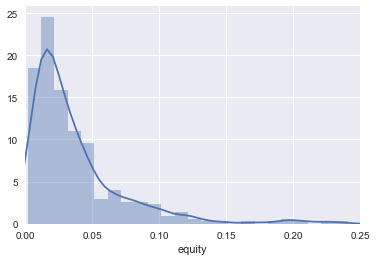

In [63]:
equity = sns.distplot(f_pre["equity"])
sns.plt.xlim(0, 0.25)
# plt.xticks(np.linspace(0, 0.25, num = 52))
# equity.set_xticklabels(np.linspace(0, 0.25, num = 26))

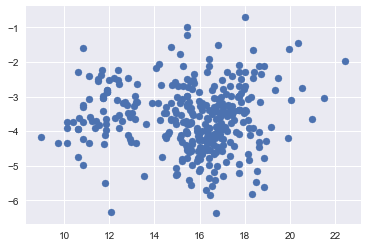

In [47]:
plt.scatter(np.log(f_pre["individual_invested"]), np.log(f_pre["equity"]))
# sns.plt.ylim(0, .25)
# sns.plt.xlim(0, 50000000)

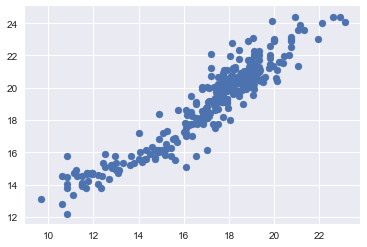

In [61]:
plt.scatter(np.log(f_pre["Money Raised"]), np.log(f_pre["Pre-Money Valuation"]))

# sns.jointplot(x=np.log(f_pre["Money Raised"]), y=np.log(f_pre["Pre-Money Valuation"]), 
#               kind = 'scatter')

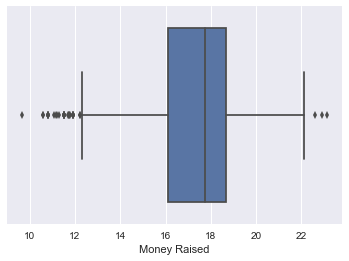

In [49]:
sns.boxplot(x = np.log(f_pre["Money Raised"]), data = f_pre)

/Users/Jerry/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


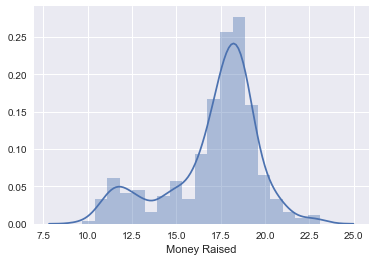

In [50]:
sns.distplot(np.log(f_pre["Money Raised"]))
# sns.plt.xlim(10000, 1000000000)
# plt.xticks(np.linspace(1000000, 1000000000, num = 3))


In [ ]:
sns.jointplot(x=np.log(f_pre["Money Raised"]), y=np.log(f_pre["Pre-Money Valuation"]), 
              kind = 'scatter')


In [60]:
print(f_merge["Equity Only Funding"].value_counts())
print(f_merge["Funding Type"].nunique())
print(f_merge[f_merge["Equity Only Funding"] == False]["Funding Type"].nunique())
print(f_merge[f_merge["Equity Only Funding"] == True]["Funding Type"].nunique())


set(f_merge[f_merge["Equity Only Funding"] == False]["Funding Type"].unique()) - set(f_merge[f_merge["Equity Only Funding"] == True]["Funding Type"].unique())

f_merge["Funding Type"].value_counts()

True     8164
False    1359
Name: Equity Only Funding, dtype: int64
22
6
16


Seed                        2891
Series A                    1544
Series B                    1281
Grant                       1006
Series C                     839
Venture - Series Unknown     736
Series D                     417
Convertible Note             316
Series E                     177
Angel                         98
Series F                      72
Private Equity                50
Debt Financing                29
Funding Round                 22
Series G                      18
Post-IPO Equity               15
Secondary Market               4
Corporate Round                3
Series H                       2
Product Crowdfunding           1
Equity Crowdfunding            1
Initial Coin Offering          1
Name: Funding Type, dtype: int64

In [ ]:
num_only = re.compile(r'[\d]+')
num_only.search("$180,000,000").group()
num_only.findall("$180,000,000")

In [ ]:
from sys import stdin

marks = []
for line in stdin:
    marks.append(line)


In [ ]:
import numpy as np

array = [1,2,3,4,5]

[np.mean(array) for x in array]

In [ ]:
x = "hello   "
x

In [ ]:
x.strip()

In [ ]:
for letter in x:
    print(letter)

In [ ]:
x = "a"
y = "a"

x == y

In [ ]:
x = "hello"
y = ""

In [ ]:
for letter in x:
    y = y + letter
    
y

In [ ]:
import re, string, timeit

In [ ]:
import string
s = "hello, 12/!f2438*"
table = string.maketrans("","")
s.translate(table, string.punctuation)
s

In [ ]:
exclude = set(string.punctuation)
s = ''.join(ch for ch in s if ch not in exclude)
s